In [68]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib notebook
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/elkha/Desktop/clinvar_conflicting.csv")

C:\Users\elkha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Descriptive Analysis

### Data type

In [143]:
df.dtypes

CHROM                  object
POS                     int64
REF                    object
ALT                    object
AF_ESP                float64
AF_EXAC               float64
AF_TGP                float64
CLNDISDB               object
CLNDISDBINCL           object
CLNDN                  object
CLNDNINCL              object
CLNHGVS                object
CLNSIGINCL             object
CLNVC                  object
CLNVI                  object
MC                     object
ORIGIN                  int64
SSR                   float64
CLASS                   int64
Allele                 object
Consequence            object
IMPACT                 object
SYMBOL                 object
Feature_type           object
Feature                object
BIOTYPE                object
EXON                   object
INTRON                 object
cDNA_position          object
CDS_position           object
Protein_position       object
Amino_acids            object
Codons                 object
DISTANCE  

Here I tried to go a little further by making a dataframe specifying the total attributes of each type and the indices corresponding. 

In [144]:
a=df.dtypes.unique()
b=[]
for i in range(len(a)): 
    select_indices = list(np.where(df.dtypes == a[i])[0])
    select_indices = df.dtypes.iloc[select_indices].index.tolist()
    b.append([a[i],len(select_indices),select_indices])
    #print(select_indices)

In [139]:
dtypes=pd.DataFrame(b,columns=["Types","Total Attributes", "Attributes"])

In [140]:
dtypes

,Types,Total Attributes,Attributes
0,object,31,"[CHROM, REF, ALT, CLNDISDB, CLNDISDBINCL, CLND..."
1,int64,3,"[POS, ORIGIN, CLASS]"
2,float64,12,"[AF_ESP, AF_EXAC, AF_TGP, SSR, DISTANCE, STRAN..."


### Conclusion
The dominant type is **categorical**. 

### Missing values
I'll try to show the percentage of missing values for each attribute. 

In [148]:
df.isnull().sum().sort_values(ascending=False)*100/65186

MOTIF_SCORE_CHANGE    100.000000
HIGH_INF_POS          100.000000
MOTIF_POS             100.000000
MOTIF_NAME            100.000000
DISTANCE               99.837388
SSR                    99.803639
CLNSIGINCL             99.746878
CLNDNINCL              99.746878
CLNDISDBINCL           99.746878
INTRON                 86.498635
PolyPhen               61.964225
SIFT                   61.902863
BLOSUM62               60.741570
CLNVI                  57.572178
BAM_EDIT               50.960329
Codons                 15.346854
Amino_acids            15.346854
Protein_position       15.271684
CDS_position           15.271684
EXON                   13.642500
cDNA_position          13.628693
LoFtool                 6.463044
CADD_PHRED              1.675206
CADD_RAW                1.675206
MC                      1.297825
SYMBOL                  0.024545
BIOTYPE                 0.024545
Feature_type            0.021477
Feature                 0.021477
STRAND                  0.021477
Allele    

### Descriptive Statistics

In [149]:
df.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,DISTANCE,STRAND,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,65188.000000,130.000000,65188.000000,108.000000,65174.000000,2.0,2.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.342486,2.269231,0.252102,825.731481,-0.006659,1.0,-0.080000,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.688772,4.190777,0.434223,1069.363315,0.999985,0.0,0.024042,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,1.0,-0.097000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.500000,-1.000000,1.0,-0.088500,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,1.000000,0.000000,469.000000,-1.000000,1.0,-0.080000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,1415.000000,1.000000,1.0,-0.071500,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,16.000000,1.000000,4759.000000,1.000000,1.0,-0.063000,1.000000,99.000000,46.556261,3.000000


### Distribution Histogram

<IPython.core.display.Javascript object>


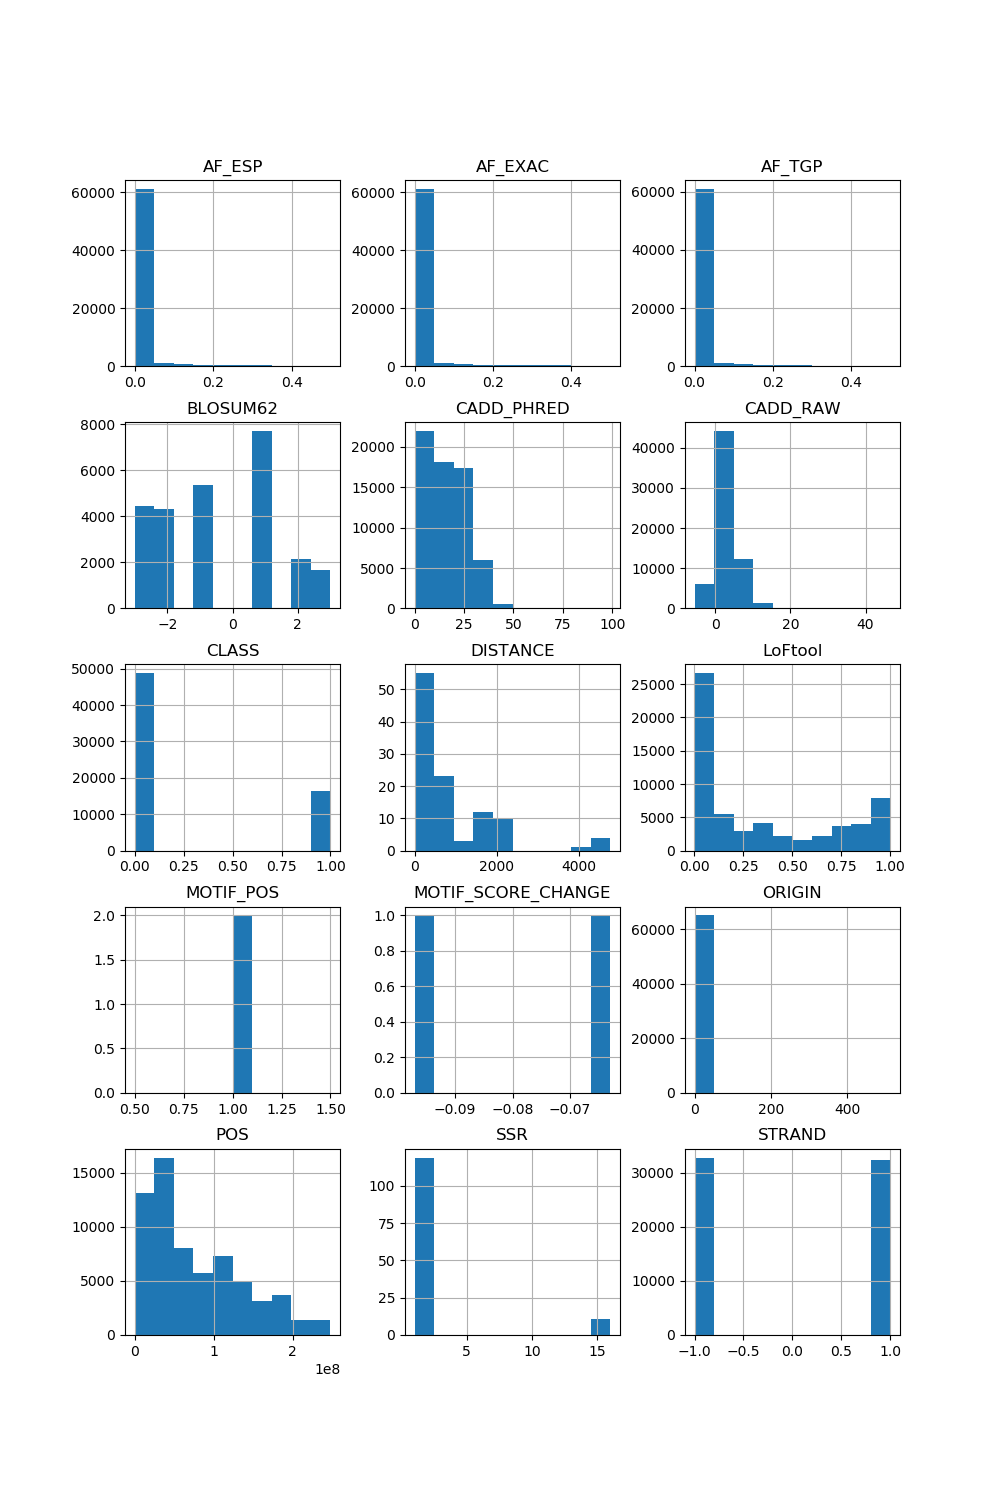

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002281B546488>,
      dtype=object)

In [166]:
df.hist(layout=(5,3),figsize=(10,15))

### For educational purposes

<IPython.core.display.Javascript object>


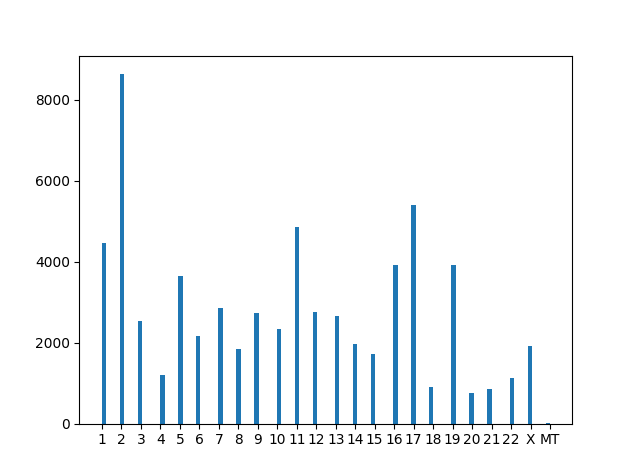

(array([4454.,    0.,    0.,    0., 8645.,    0.,    0.,    0., 2529.,
           0.,    0.,    0.,    0., 1206.,    0.,    0.,    0., 3643.,
           0.,    0.,    0., 2159.,    0.,    0.,    0.,    0., 2867.,
           0.,    0.,    0., 1852.,    0.,    0.,    0., 2744.,    0.,
           0.,    0.,    0., 2341.,    0.,    0.,    0., 4846.,    0.,
           0.,    0., 2750.,    0.,    0.,    0.,    0., 2646.,    0.,
           0.,    0., 1974.,    0.,    0.,    0., 1725.,    0.,    0.,
           0.,    0., 3927.,    0.,    0.,    0., 5394.,    0.,    0.,
           0.,  896.,    0.,    0.,    0.,    0., 3911.,    0.,    0.,
           0.,  759.,    0.,    0.,    0.,  843.,    0.,    0.,    0.,
           0., 1135.,    0.,    0.,    0., 1926.,    0.,    0.,    0.,
          16.]),
 array([ 0.  ,  0.23,  0.46,  0.69,  0.92,  1.15,  1.38,  1.61,  1.84,
         2.07,  2.3 ,  2.53,  2.76,  2.99,  3.22,  3.45,  3.68,  3.91,
         4.14,  4.37,  4.6 ,  4.83,  5.06,  5.29,  5.52,  5.

In [21]:
#after having learned about histogramms. 
plt.figure()
plt.hist(df['CHROM'],bins=100)

This down below returns a series. Series can be plotted easily using Series.plot(). It'll be used somewhere down. But in case we want to extract the X and Y values from a series, you can use the functions down below. 

In [7]:
df['CHROM'].value_counts()

2     8166
17    4918
11    4719
1     4454
5     3643
16    3586
19    3513
7     2867
9     2744
13    2515
12    2447
10    2341
6     2159
X     1926
8     1852
14    1755
3     1579
15    1557
4     1206
22    1043
3      950
18     785
21     724
20     682
2      479
17     476
19     398
16     341
12     303
14     219
15     168
13     131
11     127
21     119
18     111
22      92
20      77
MT      16
Name: CHROM, dtype: int64

The next 3 lines of code is to unify all values of CHROM to strings.

In [8]:
a=df['CHROM'].astype('str')

In [9]:
a.values

array(['1', '1', '1', ..., 'X', 'X', 'X'], dtype=object)

In [10]:
df['CHROM']=a.values

The function *index.values* returns an array of the index in question. 

In [11]:
df['CHROM'].value_counts().index.values

array(['2', '17', '11', '1', '16', '19', '5', '7', '12', '9', '13', '3',
       '10', '6', '14', 'X', '8', '15', '4', '22', '18', '21', '20', 'MT'],
      dtype=object)

The function *to_numpy()* returns an array of the values

In [12]:
df['CHROM'].value_counts().to_numpy()

array([8645, 5394, 4846, 4454, 3927, 3911, 3643, 2867, 2750, 2744, 2646,
       2529, 2341, 2159, 1974, 1926, 1852, 1725, 1206, 1135,  896,  843,
        759,   16], dtype=int64)

### Plotting with Series.plot()

The plot represents the frequency of every CHROM in the data.

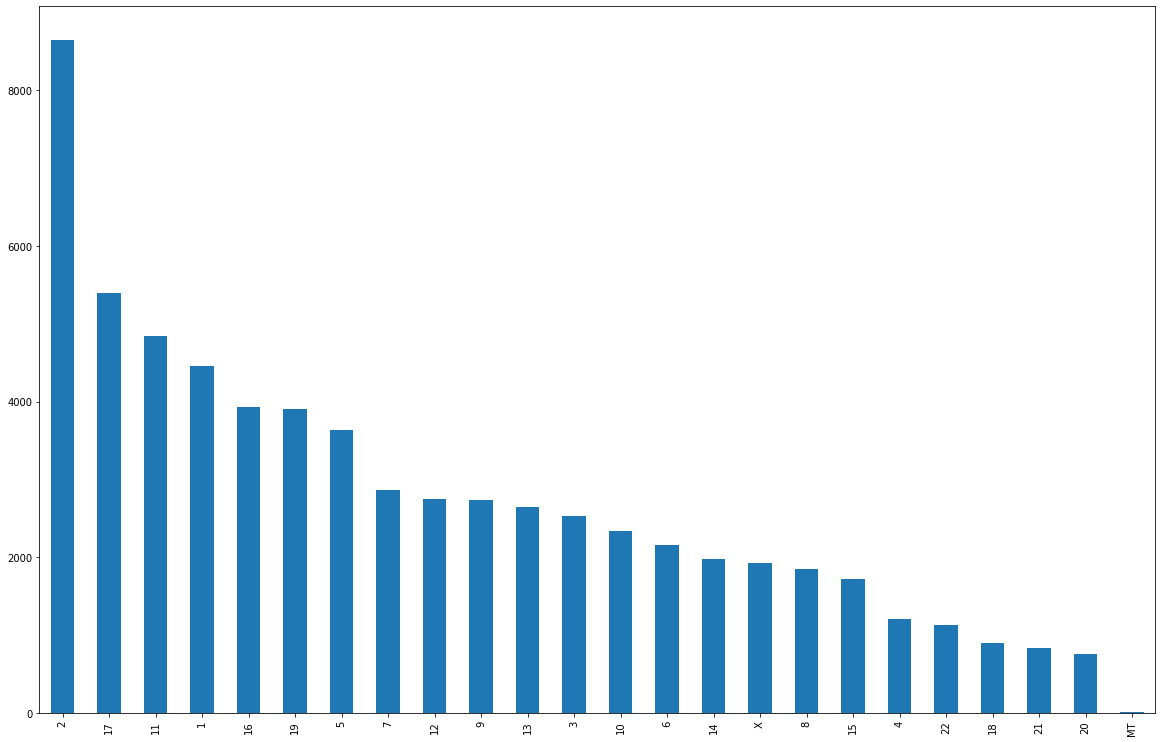

In [10]:
df['CHROM'].value_counts().plot(kind='bar',figsize=(20,13))

what I noticed is the fact that some values are repeated in strings and a distinction between them has been done. 
I fixed it, the more accurate version is down below. 

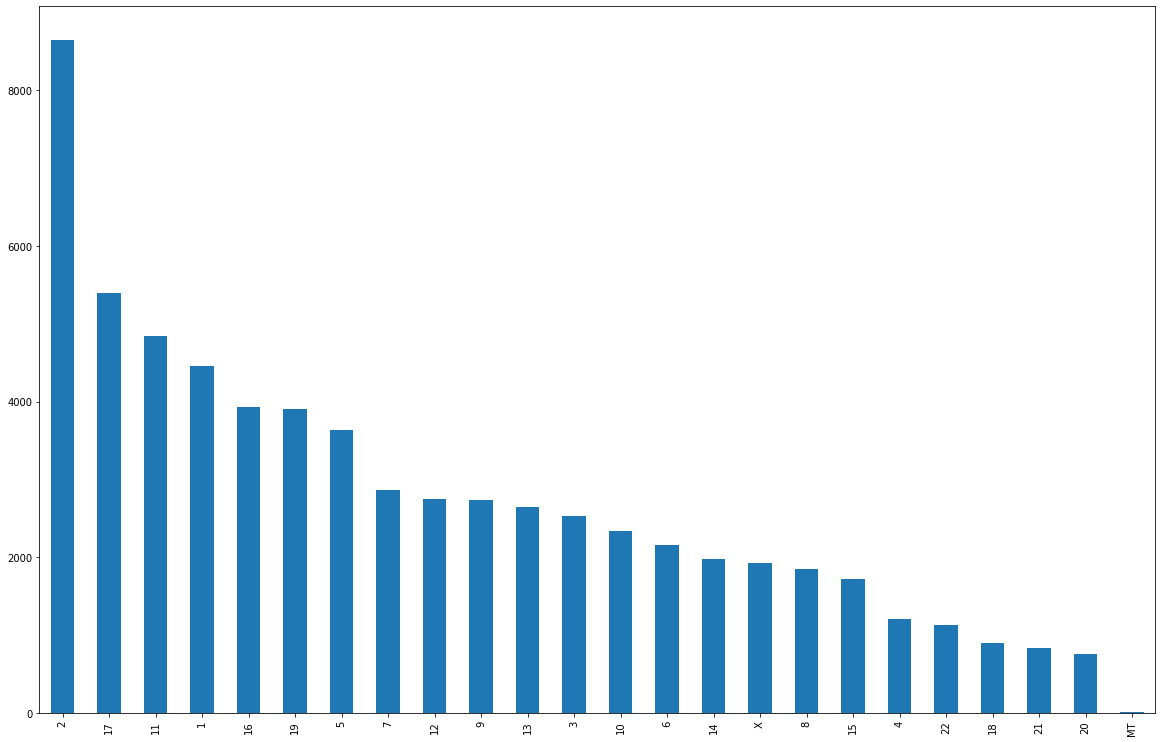

In [11]:
df['CHROM'].value_counts().plot(kind='bar',figsize=(20,13))

In [12]:
df

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


### Relationship between CLASS and CHROM: Visualization 

The idea was to visualize the pourcentage of Class '0' and '1' in function of every other CHROM. 
There must be a more easier version of doing this in few lines of code. 

In [13]:
result = pd.concat([df['CLASS'],df['CHROM']], axis=1, sort=False)

In [14]:
result

,CLASS,CHROM
0,0,1
1,0,1
2,1,1
3,0,1
4,0,1
...,...,...
65183,0,X
65184,1,X
65185,0,X
65186,0,X


In [15]:
df1=result.where(result['CLASS']==1)

In [16]:
df0=result.where(result['CLASS']==0)

In [17]:
df0

,CLASS,CHROM
0,0.0,1
1,0.0,1
2,NaN,NaN
3,0.0,1
4,0.0,1
...,...,...
65183,0.0,X
65184,NaN,NaN
65185,0.0,X
65186,0.0,X


In [18]:
c1 = df1[df.CLASS.notnull()]

In [19]:
c1

,CLASS,CHROM
0,NaN,NaN
1,NaN,NaN
2,1.0,1
3,NaN,NaN
4,NaN,NaN
...,...,...
65183,NaN,NaN
65184,1.0,X
65185,NaN,NaN
65186,NaN,NaN


In [20]:
c0 = df0[df0.CLASS.notnull()]

In [21]:
c0

,CLASS,CHROM
0,0.0,1
1,0.0,1
3,0.0,1
4,0.0,1
5,0.0,1
...,...,...
65182,0.0,X
65183,0.0,X
65185,0.0,X
65186,0.0,X


In [22]:
c0= c0.groupby('CHROM').count()

In [23]:
c0=c0.rename(columns={"CLASS": "0"})

In [24]:
c0

,0
CHROM,
1,3237
10,1709
11,3833
12,2095
13,1883
14,1401
15,1222
16,3026
17,4146


In [25]:
c1=c1.groupby('CHROM').count()

In [27]:
c1=c1.rename(columns={"CLASS": "1"})

In [28]:
c1

,1
CHROM,
1,1217
10,632
11,1013
12,655
13,763
14,573
15,503
16,901
17,1248


In [29]:
classres = pd.concat([c1,c0], axis=1, sort=False)

In [30]:
classres

,1,0
CHROM,,
1,1217,3237
10,632,1709
11,1013,3833
12,655,2095
13,763,1883
14,573,1401
15,503,1222
16,901,3026
17,1248,4146


In [31]:
classres.loc[:,'Row_Total'] = classres.sum(numeric_only=True, axis=1)
classres.loc[:,'1_%'] = classres['1']/classres['Row_Total']*100
classres.loc[:,'0_%'] = classres['0']/classres['Row_Total']*100

In [32]:
classres

,1,0,Row_Total,1_%,0_%
CHROM,,,,,
1,1217,3237,4454,27.323754,72.676246
10,632,1709,2341,26.997010,73.002990
11,1013,3833,4846,20.903838,79.096162
12,655,2095,2750,23.818182,76.181818
13,763,1883,2646,28.835979,71.164021
14,573,1401,1974,29.027356,70.972644
15,503,1222,1725,29.159420,70.840580
16,901,3026,3927,22.943723,77.056277
17,1248,4146,5394,23.136819,76.863181


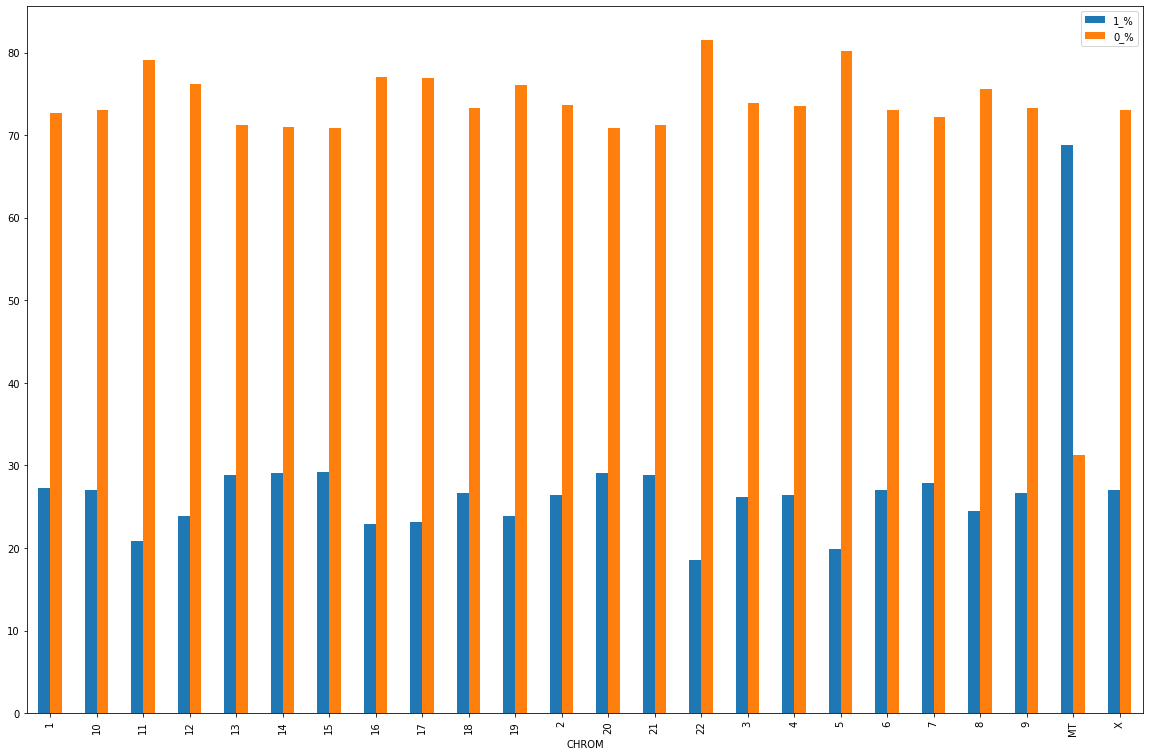

In [33]:
classres.plot(use_index=True, y=['1_%','0_%'], kind='bar', figsize=(20,13))

This is where I noticed that CLASS 0 might be taking over the data. 

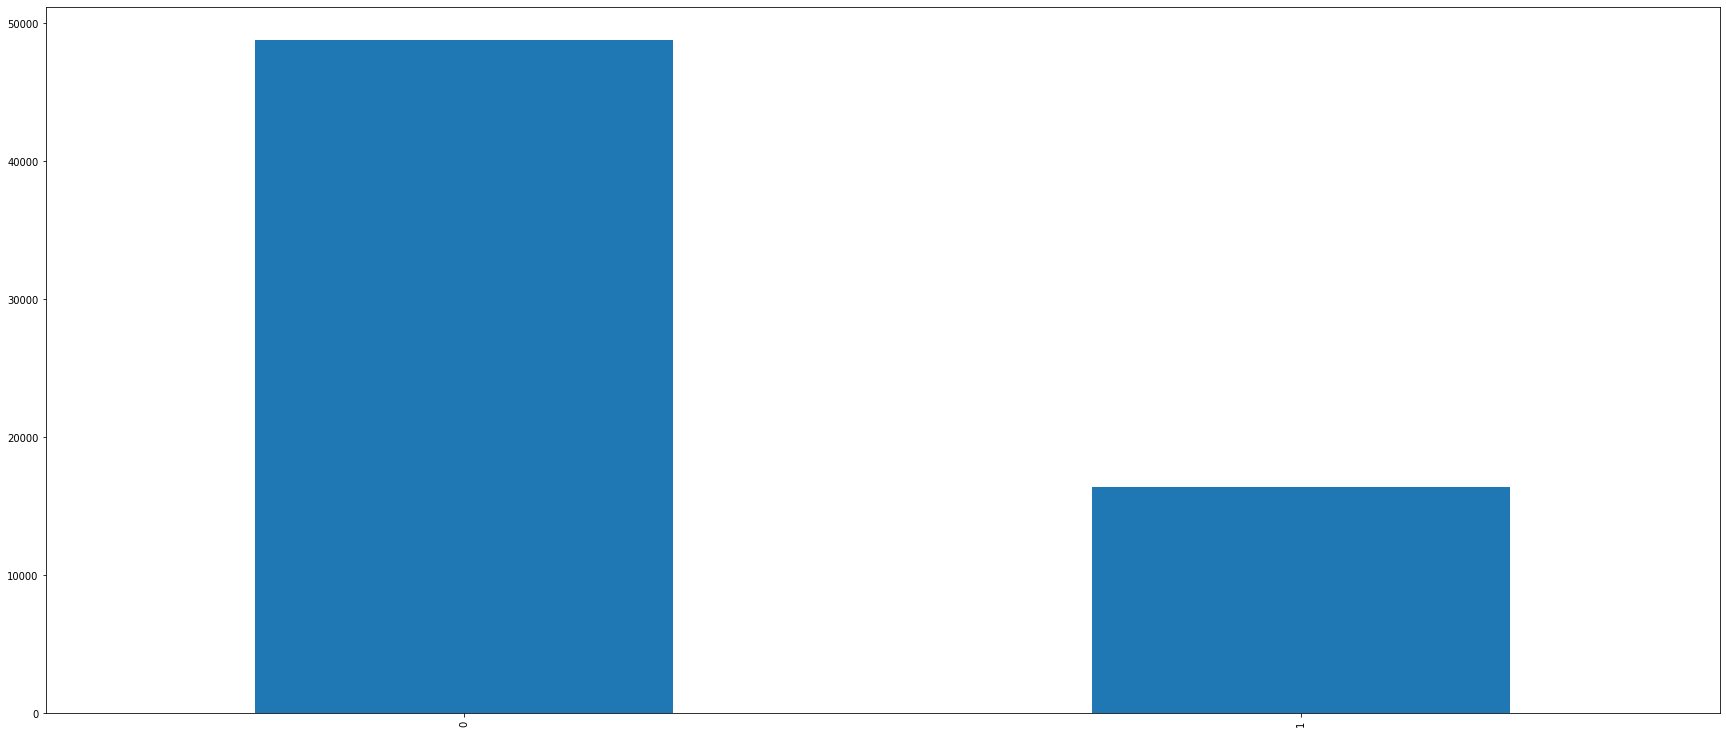

In [34]:
df['CLASS'].value_counts().plot(kind='bar',figsize=(30,13))

### Dropping empty columns

In [35]:
df.isnull().sum().sort_values(ascending=False)*100/65186

MOTIF_SCORE_CHANGE    100.000000
HIGH_INF_POS          100.000000
MOTIF_POS             100.000000
MOTIF_NAME            100.000000
DISTANCE               99.837388
SSR                    99.803639
CLNSIGINCL             99.746878
CLNDNINCL              99.746878
CLNDISDBINCL           99.746878
INTRON                 86.498635
PolyPhen               61.964225
SIFT                   61.902863
BLOSUM62               60.741570
CLNVI                  57.572178
BAM_EDIT               50.960329
Codons                 15.346854
Amino_acids            15.346854
Protein_position       15.271684
CDS_position           15.271684
EXON                   13.642500
cDNA_position          13.628693
LoFtool                 6.463044
CADD_PHRED              1.675206
CADD_RAW                1.675206
MC                      1.297825
SYMBOL                  0.024545
BIOTYPE                 0.024545
Feature_type            0.021477
Feature                 0.021477
STRAND                  0.021477
Allele    

We first drop the first for columns with 100% of missing values

In [36]:
df=df.drop(['MOTIF_SCORE_CHANGE','HIGH_INF_POS','MOTIF_POS','MOTIF_NAME'],axis=1)

In [37]:
df.isnull().sum().sort_values(ascending=False)*100/65188

DISTANCE            99.834325
SSR                 99.800577
CLNSIGINCL          99.743818
CLNDISDBINCL        99.743818
CLNDNINCL           99.743818
INTRON              86.495981
PolyPhen            61.962324
SIFT                61.900963
BLOSUM62            60.739707
CLNVI               57.570412
BAM_EDIT            50.958765
Codons              15.346383
Amino_acids         15.346383
Protein_position    15.271216
CDS_position        15.271216
EXON                13.642081
cDNA_position       13.628275
LoFtool              6.462846
CADD_RAW             1.675155
CADD_PHRED           1.675155
MC                   1.297785
BIOTYPE              0.024544
SYMBOL               0.024544
Feature_type         0.021476
Feature              0.021476
STRAND               0.021476
REF                  0.000000
ALT                  0.000000
POS                  0.000000
AF_ESP               0.000000
AF_EXAC              0.000000
AF_TGP               0.000000
CLNDISDB             0.000000
Consequenc